# <span style="color:teal">**Exploratory Analysis of Iris Data**</span>

### **Author:** Kami Denny
### **Purpose:** Perform exploratory data analysis (EDA) using pandas and other tools
### **Date:** February 2nd, 2025

<hr style="border: 1px solid teal;">

#### 1. Imports

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

<hr style="border: 1px solid teal;">

#### 2. Load Data

In [31]:
# Load the Iris dataset into pandas DataFrame
iris_df: pd.DataFrame = sns.load_dataset('iris')

# List column names
iris_df.columns

# Inspect first few rows of the DataFrame
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


<hr style="border: 1px solid teal;">

#### 3. Initial Data Inspection

In [32]:
# Inspect the shape of the DataFrame with shape attribute
iris_df.shape

# Inspect the data types of the columns with dtypes attribute
iris_df.dtypes

# Inspect the data types of the columns with info() method
iris_df.info()

# Get the unique values in a specific column
unique_species = iris_df['species'].unique()
print(f"Unique values in the 'species' column: {unique_species}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Unique values in the 'species' column: ['setosa' 'versicolor' 'virginica']


#### <span style="color:teal">**Summary of Initial Inspection**</span>
##### - The data doesn't have any null values in the 150 total attributes.
##### - The DataFrame contains 5 columns: `sepal_length`, `sepal_width`, `petal_length`, `petal_width`, and `species`.
##### - The first four columns are numerical, and the `species` column is categorical.
##### - The unique values in the `species` column are: `setosa`, `versicolor`, and `virginica`.

<hr style="border: 1px solid teal;">

#### 4. Initial Descriptive Statistics

In [33]:
# Inspect summary statistics for numerical columns:
#`sepal_length`, `sepal_width`, `petal_length`, `petal_width`
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<hr style="border: 1px solid teal;">

#### 5. Initial Data Distribution for Numerical Columns

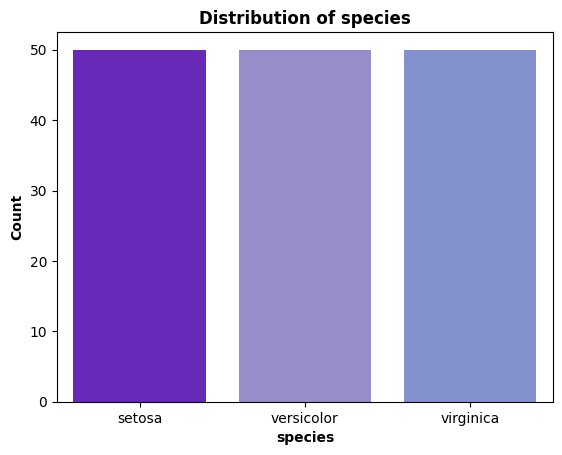

In [34]:
# Inspect value counts by categorical column
iris_df['species'].value_counts()

# Define the corrected color dictionary
color_dict = {
    'setosa': '#6511d0',
    'versicolor': '#8f83d3',
    'virginica': '#778ad9'
}

# Inspect value counts for ALL categorical columns
for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot with specified colors
    sns.countplot(x=col, data=iris_df, hue=col, palette=color_dict, legend=False)
    plt.title(f'Distribution of {col}', fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.show()

#### <span style="color:teal">**Summary of Distribution**</span>
##### - Each species (`setosa`, `versicolor`, and `virginica`) has 50 features.
##### - The Iris dataset contains an equal number of samples for each species.
##### - This balance ensures that the dataset is not biased towards any particular species.

<hr style="border: 1px solid teal;">

#### 6. Initial Data Transformation and Feature Engineering

In [35]:
# Renaming current columns
iris_df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)
iris_df.rename(columns={'sepal_width': 'Sepal Width'}, inplace=True)
iris_df.rename(columns={'petal_length': 'Petal Length'}, inplace=True)
iris_df.rename(columns={'petal_width': 'Petal Width'}, inplace=True)
iris_df.rename(columns={'species': 'Species'}, inplace=True)

# Creating new area columns
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['Sepal Width']
iris_df['Petal Area'] = iris_df['Petal Length'] * iris_df['Petal Width']

# Inspect first few rows of the DataFrame with Updates
iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Sepal Area,Petal Area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


#### <span style="color:teal">**Summary of Data Frame Changes**</span>
##### - Updated all column names to follow proper case convention.
##### - Added two new columns: Petal Area and Sepal Length.

<hr style="border: 1px solid teal;">

#### 7. Initial Visualizations